# Karakteristik Qubit

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from jc_model import *
%matplotlib inline

In [21]:
wa = 2*np.pi     #frekuensi atom
wc_list = [0.8*wa, 0.95*wa, 1.0*wa]          #frekuensi medan
N = 15
use_rwa = False
g = 0.05*wa
tlist = np.linspace(0,100,301)

# Keadaan awal
#psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi
psi_0 = tensor(basis(N,1), basis(2,0)) # keadaan dasar

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

#sm = tensor(destroy(2), qeye(N))  
#a = tensor(qeye(2), destroy(N)) 


In [22]:
P_e = []
P_g = []
for wc in wc_list:
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm, sm*sm.dag()])
    P_e.append(me_result.expect[0])
    #P_g.append(me_result.expect[1])
    print(wc)

5.026548245743669
5.969026041820607
6.283185307179586


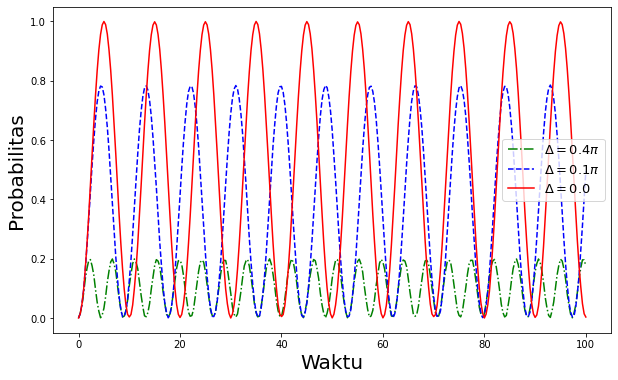

In [23]:
# plot grafik
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_e[0],'g-.', label=r"$\Delta=0.4\pi$")
axes.plot(tlist, P_e[1],'b--', label=r"$\Delta=0.1\pi$")
axes.plot(tlist, P_e[2],'r-', label=r"$\Delta=0.0$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('Waktu', fontsize=20)
axes.set_ylabel('Probabilitas', fontsize=20)
plt.savefig('Plot_prob okupasi_karakteristik qubit.pdf')